In [2]:
#importing libraries
import pandas as pd #work with dataframes
import numpy as np #work with arrays
import matplotlib.pyplot as plt #plot graphs to visualize our data
import seaborn as sns #library made on top of matplotlib for data vis

In [4]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


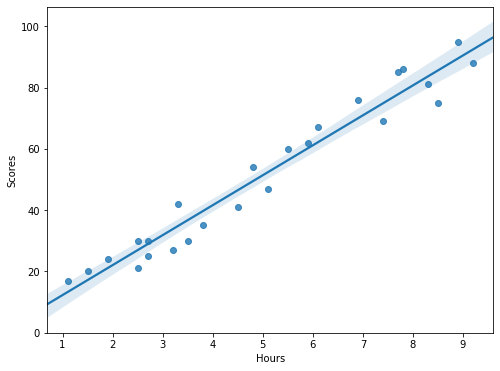

In [6]:
plt.figure(figsize=(8,6))
sns.regplot("Hours","Scores",data=df)

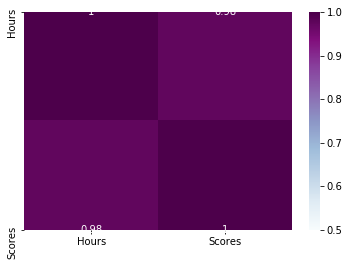

In [13]:
#although this dataset has one independent variable, sometimes datasets can have more than one variable and in those cases one can use a heat map to compare the variables
sns.heatmap(df.corr(),cmap="BuPu",annot=True, vmin=0.5, vmax=1)

In [17]:
X = df[['Hours']].values
Y = df[['Scores']].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
#random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [32]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
yhat = lm.predict(X_test)
score = r2_score(y_test,yhat)
print("percentage is:", score*100,"%")

percentage is: 94.54906892105356 %


In [27]:
print("coeff is" ,lm.coef_)
print("intercept is", lm.intercept_)

coeff is [[9.91065648]]
intercept is [2.01816004]


In [46]:
pred = pd.DataFrame()
y_test = y_test.reshape(1,5)
yhat = yhat.reshape(1,5)
print(y_test)
print(yhat)

[[20 27 69 30 62]]
[[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]]


In [48]:
pred["Actual Values"]=y_test[0]
pred["Predicted Values"] = yhat[0]
pred

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


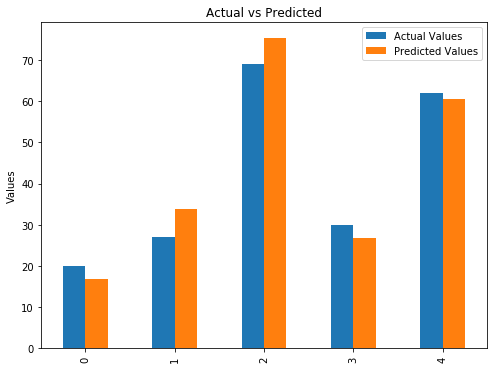

In [49]:
pred.plot(kind='bar', figsize=(8,6))
plt.title("Actual vs Predicted")
plt.ylabel("Values")
plt.show()